# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

0.4627196156235579
2.664532906581316 0.4591691937647434
2.668533706741348 0.4556114222690675
2.67253450690138 0.45204635808357463
2.676535307061412 0.44847405827203896
2.680536107221444 0.44489458001405074
2.684536907381476 0.44130798060410126
2.6885377075415082 0.4377143174506656
2.6925385077015402 0.4341136480752838
2.6965393078615723 0.43050603011164024
2.7005401080216043 0.426891521304641
2.7045409081816363 0.4232701795094896
2.7085417083416683 0.419642062690761
2.7125425085017003 0.4160072289214737
2.7165433086617323 0.4123657363821604
2.7205441088217643 0.4087176433599365
2.7245449089817964 0.4050630082475672
2.7285457091418284 0.4014018895425331
2.7325465093018604 0.39773434584609335
2.7365473094618924 0.3940604358623482
2.7405481096219244 0.39038021839729903
2.7445489097819564 0.38669375235790715
2.7485497099419884 0.3830010967511509
2.7525505101020205 0.37930231068308135
2.7565513102620525 0.3755974533578758
2.7605521104220845 0.3718865840768907
2.7645529105821165 0.3681697622

5.501100220044009 -0.7047602060147884
5.505101020204041 -0.7019162232073964
5.509101820364073 -0.6990610052618075
5.513102620524105 -0.6961945978797266
5.517103420684137 -0.6933170469419611
5.521104220844169 -0.6904283985076866
5.525105021004201 -0.687528698813709
5.529105821164233 -0.6846179942737255
5.533106621324265 -0.6816963314775805
5.537107421484297 -0.6787637571905205
5.541108221644329 -0.6758203183524457
5.545109021804361 -0.6728660620771585
5.549109821964393 -0.6699010356516089
5.553110622124425 -0.6669252865351383
5.557111422284457 -0.6639388623587196
5.561112222444489 -0.6609418109241947
5.565113022604521 -0.6579341802035094
5.569113822764553 -0.6549160183379458
5.573114622924585 -0.651887373637351
5.577115423084617 -0.6488482945793651
5.581116223244649 -0.6457988298086439
5.585117023404681 -0.642739028136081
5.589117823564713 -0.6396689385380264
5.593118623724745 -0.6365886101555028
5.597119423884777 -0.6334980922934185
5.601120224044809 -0.6303974344197784
5.6051210242048

0.8908045914959887
8.329665933186638 0.888979557095997
8.33366673334667 0.8871402933508954
8.337667533506702 0.8852868297006393
8.341668333666734 0.8834191958124734
8.345669133826766 0.8815374215804563
8.349669933986798 0.8796415371249827
8.35367073414683 0.8777315727923005
8.357671534306862 0.8758075591540257
8.361672334466894 0.8738695270066531
8.365673134626926 0.8719175073710624
8.369673934786958 0.8699515314920232
8.37367473494699 0.8679716308376932
8.377675535107022 0.865977837099116
8.381676335267054 0.8639701821897129
8.385677135427086 0.8619486982447725
8.389677935587118 0.859913417620936
8.39367873574715 0.8578643728956797
8.397679535907182 0.8558015968667934
8.401680336067214 0.8537251225518551
8.405681136227246 0.8516349831877029
8.409681936387278 0.849531212229903
8.41368273654731 0.8474138433522139
8.417683536707342 0.8452829104460479
8.421684336867374 0.8431384476199277
8.425685137027406 0.8409804891989416
8.429685937187438 0.8388090697241934
8.43368673734747 0.836624223

11.56631326265253 -0.8415019706833333
11.570314062812562 -0.8393337932786767
11.574314862972594 -0.8371521811778996
11.578315663132626 -0.8349571693007155
11.582316463292658 -0.8327487927813197
11.58631726345269 -0.8305270869678274
11.590318063612722 -0.8282920874217073
11.594318863772754 -0.8260438299172127
11.598319663932786 -0.8237823504408089
11.602320464092818 -0.821507685190597
11.60632126425285 -0.8192198705757346
11.610322064412882 -0.8169189432158532
11.614322864572914 -0.8146049399404718
11.618323664732946 -0.8122778977884073
11.622324464892978 -0.8099378540071822
11.62632526505301 -0.8075848460524276
11.630326065213042 -0.8052189115872846
11.634326865373074 -0.8028400884818004
11.638327665533106 -0.800448414812323
11.642328465693138 -0.7980439288608914
11.64632926585317 -0.7956266691146228
11.650330066013202 -0.7931966742650965
11.654330866173234 -0.790753983207735
11.658331666333266 -0.7882986350411811
11.662332466493298 -0.7858306690666716
11.66633326665333 -0.783350124787

14.498899779955991 0.9352849844005638
14.502900580116023 0.9338616378933985
14.506901380276055 0.9324233436414572
14.510902180436087 0.9309701246666251
14.51490298059612 0.9295020042296782
14.518903780756151 0.9280190058299109
14.522904580916183 0.92652115320476
14.526905381076215 0.9250084703294247
14.530906181236247 0.9234809814164827
14.53490698139628 0.9219387109155028
14.538907781556311 0.9203816835126537
14.542908581716343 0.9188099241303086
14.546909381876375 0.9172234579266463
14.550910182036407 0.9156223102952484
14.55491098219644 0.9140065068646936
14.558911782356471 0.9123760734981463
14.562912582516503 0.9107310362929435
14.566913382676535 0.9090714215801768
14.570914182836567 0.9073972559242709
14.5749149829966 0.9057085661225585
14.578915783156631 0.9040053792048509
14.582916583316663 0.9022877224330065
14.586917383476695 0.900555623300493
14.590918183636727 0.8988091095319484
14.59491898379676 0.8970482090827367
14.598919783956791 0.8952729501385007
14.602920584116823 0.

-0.9928888930003319
17.16343268653731 -0.9933572195992323
17.16743348669734 -0.9938096461444336
17.171434286857373 -0.9942461653942245
17.175435087017405 -0.9946667703615117
17.179435887177437 -0.9950714543139321
17.18343668733747 -0.9954602107739603
17.1874374874975 -0.9958330335190124
17.191438287657533 -0.9961899165815457
17.195439087817565 -0.9965308542491541
17.199439887977597 -0.9968558410646595
17.20344068813763 -0.9971648718261993
17.20744148829766 -0.9974579415873095
17.211442288457693 -0.997735045657004
17.215443088617725 -0.9979961795998495
17.219443888777757 -0.9982413392360369
17.22344468893779 -0.9984705206414476
17.22744548909782 -0.9986837201477169
17.231446289257853 -0.9988809343422923
17.235447089417885 -0.9990621600684885
17.239447889577917 -0.9992273944255373
17.24344868973795 -0.9993766347686349
17.24744948989798 -0.9995098787089834
17.251450290058013 -0.9996271241138299
17.255451090218045 -0.9997283691064995
17.259451890378077 -0.9998136120664265
17.26345269053811

19.767953590718143 0.7946298748039452
19.771954390878175 0.7970523713043449
19.775955191038207 0.7994621098811553
19.77995599119824 0.8018590519631835
19.78395679135827 0.8042431591840624
19.787957591518303 0.8066143933828646
19.791958391678335 0.8089727166047128
19.795959191838367 0.8113180911013882
19.7999599919984 0.8136504793319341
19.80396079215843 0.8159698439632568
19.807961592318463 0.8182761478707231
19.811962392478495 0.8205693541387553
19.815963192638527 0.822849426061421
19.81996399279856 0.8251163271430211
19.82396479295859 0.8273700210986744
19.827965593118623 0.8296104718548978
19.831966393278655 0.8318376435501836
19.835967193438687 0.8340515005355742
19.83996799359872 0.8362520073752322
19.84396879375875 0.8384391288470077
19.847969593918783 0.8406128299430019
19.851970394078815 0.842773075870128
19.855971194238847 0.8449198320506673
19.85997199439888 0.8470530641228237
19.86397279455891 0.8491727379412726
19.867973594718944 0.8512788195777083
19.871974394878976 0.8533

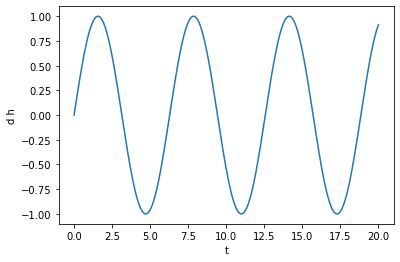

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

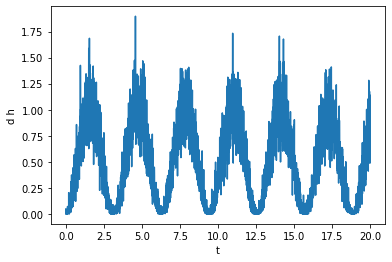

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

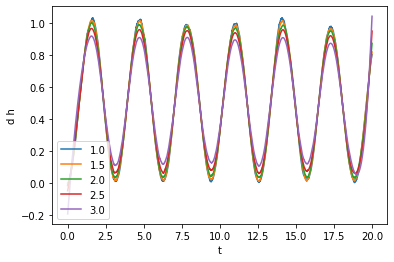

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

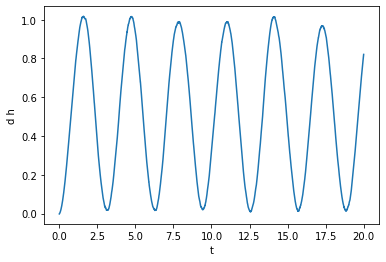

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.2218


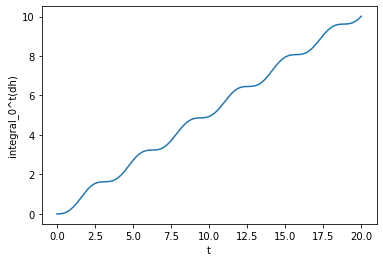

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

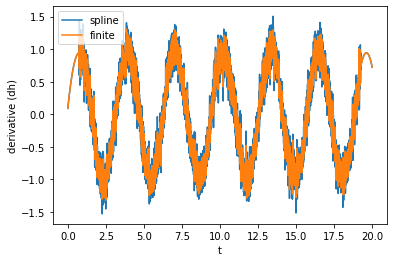

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

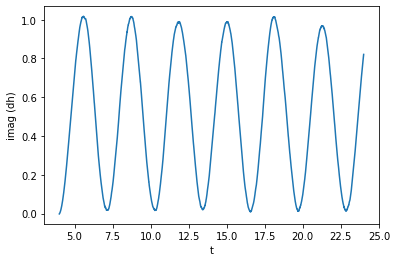

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

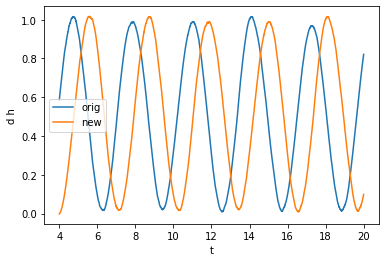

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

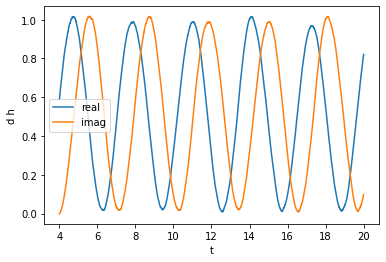

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

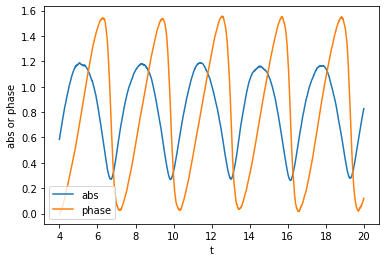

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

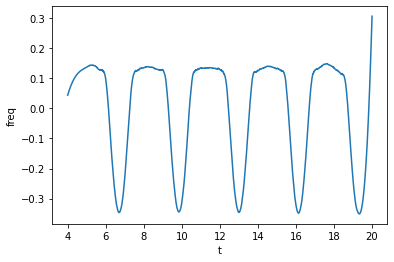

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

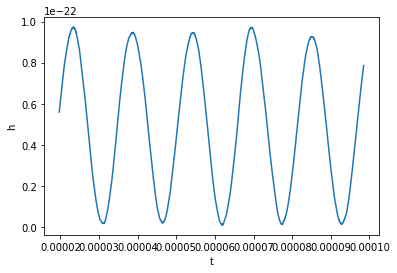

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

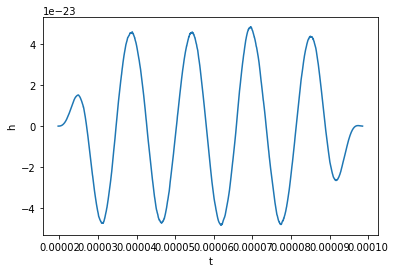

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

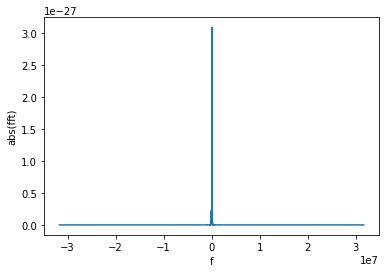

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

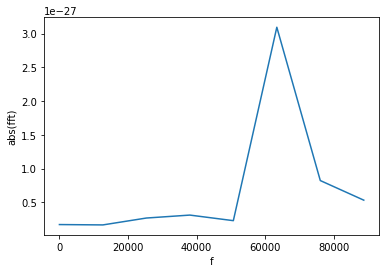

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64165.67


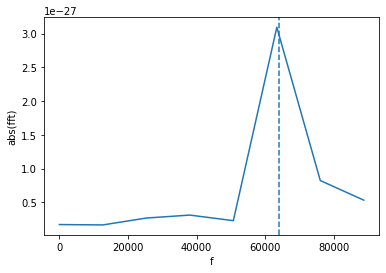

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.093e-27
Maximum with mask 8.237e-28
Length with mask 8
Length after having removed the masked points 7
